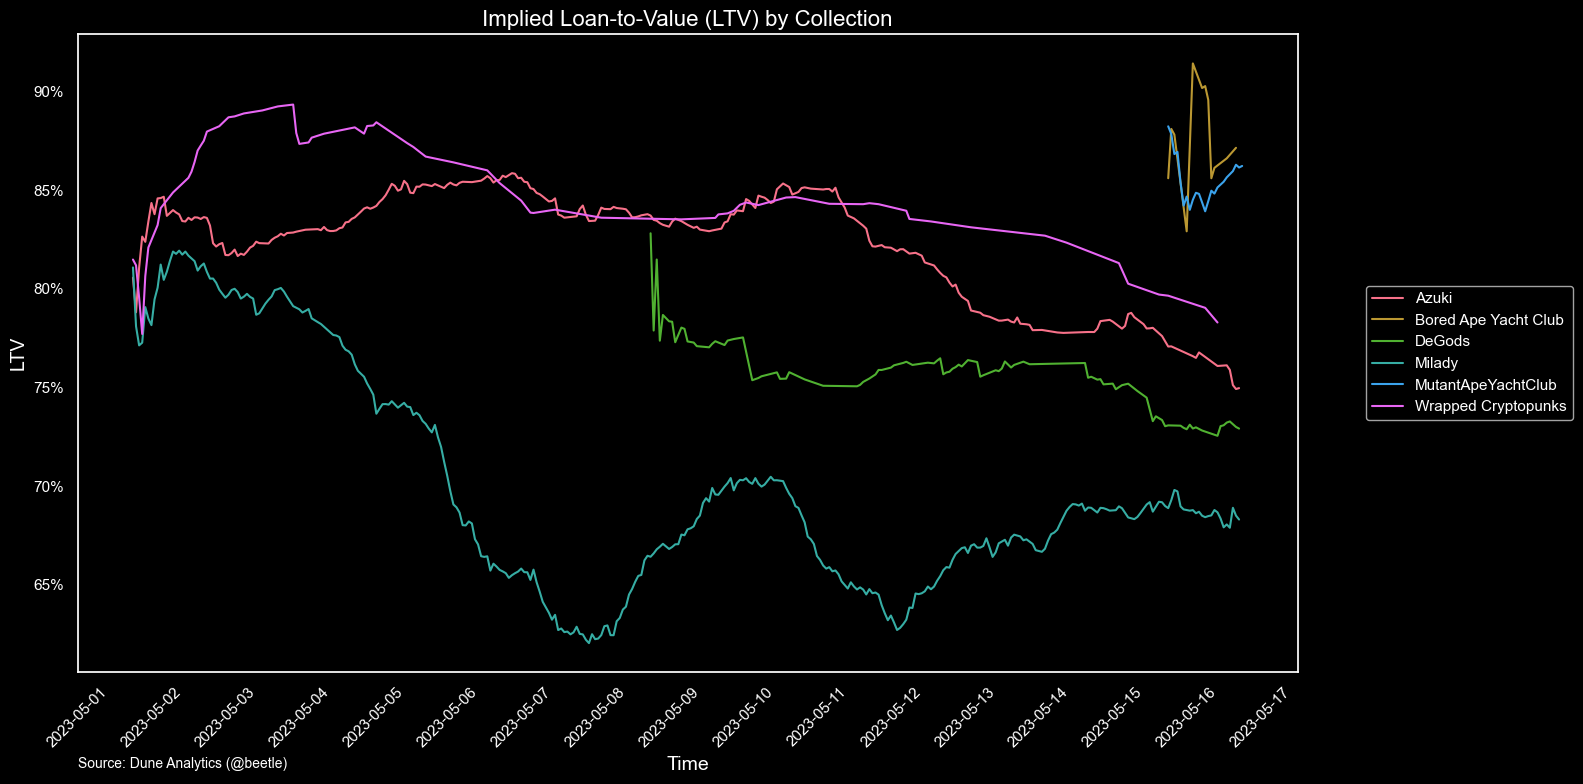

In [36]:
import pandas as pd

# Load the data
data = pd.read_csv('ltv.csv')

# Keep only the relevant columns and rename them
data = data[['execution_succeeded__data__time', 'execution_succeeded__data__name', 'execution_succeeded__data__moving_ltv', 'execution_succeeded__data__moving_rate']]
data.columns = ['time', 'name', 'moving_ltv', 'moving_rate']

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


# Ensure pandas plot function uses matplotlib converters
register_matplotlib_converters()

# Set the style to a seaborn theme for a professional look
sns.set_theme()
plt.style.use('dark_background')

# Set the color palette for the lines in the plot
color_palette = sns.color_palette("husl", len(data['name'].unique()))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data with the specified color palette
for (name, group), color in zip(data.groupby('name'), color_palette):
    ax.plot(group['time'], group['moving_ltv'], label=name, color=color)

# Format the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set major ticks interval to one day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set major ticks format to 'YYYY-MM-DD'

# Format the y-axis
ax.yaxis.set_major_formatter(lambda x, _: '{:.0%}'.format(x))  # Express y-axis as a percentage

# Set the title and labels
ax.set_title('Implied Loan-to-Value (LTV) by Collection', fontsize=16)
ax.set_xlabel('Time', fontsize=14, color='white')
ax.set_ylabel('LTV', fontsize=14, color='white')

# Move the legend to the right of the plot
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left',facecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax.grid(False)

# Add the source text
source_text = 'Source: Dune Analytics (@beetle)'
ax.text(0, -0.15, source_text, transform=ax.transAxes, fontsize=10, color='white')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()



In [2]:
# Run this cell if you want to make your display wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
from langchain import OpenAI, SQLDatabase, SQLDatabaseChain

llm = OpenAI(temperature=0, openai_api_key=openai_api_key)

In [29]:
sqlite_db_path = 'ltv.db'
db = SQLDatabase.from_uri(f"sqlite:///{sqlite_db_path}")

In [30]:
db_chain = SQLDatabaseChain(llm=llm, database=db, verbose=True)

/Users/beetle/rr/venv/lib/python3.10/site-packages/langchain/chains/sql_database/base.py:63: UserWarning: Directly instantiating an SQLDatabaseChain with an llm is deprecated. Please instantiate with llm_chain argument or using the from_llm class method.
  warnings.warn(


In [35]:
db_chain.run("Which collection has had the highest change in LTV since 5/1/2023?")



> Entering new SQLDatabaseChain chain...
Which collection has had the highest percentage change in LTV since 5/1/2023?
SQLQuery:SELECT "PROJECT_NAME", ("WEEKLY_AVG_RATE" - (SELECT "WEEKLY_AVG_RATE" FROM nft_data WHERE "TIME" = '2023-05-01 00:00:00.000')) / (SELECT "WEEKLY_AVG_RATE" FROM nft_data WHERE "TIME" = '2023-05-01 00:00:00.000') * 100 AS "PERCENT_CHANGE" FROM nft_data WHERE "TIME" = '2023-04-01 00:00:00.000' ORDER BY "PERCENT_CHANGE" DESC LIMIT 5;
SQLResult: [('degods', None), ('pudgypenguins', None), ('wrapped cryptopunks', None), ('cryptopunks', None), ('clone x', None)]
Answer:The collection with the highest percentage change in LTV since 5/1/2023 is degods.
> Finished chain.


'The collection with the highest percentage change in LTV since 5/1/2023 is degods.'

In [32]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
connection = sqlite3.connect(sqlite_db_path)

# Define your SQL query
query = "SELECT PROJECT_NAME, WEEKLY_AVG_ROYALTY / WEEKLY_AVG_VOLUME AS LTV FROM nft_data ORDER BY LTV DESC LIMIT 5"

# Read the SQL query into a Pandas DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

In [33]:
print(df.iloc[0,0])

clone x


In [22]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('ltv.db')

# Create a cursor object
cur = conn.cursor()

# Write your SQL query
query = "SELECT time FROM nft_data"

# Execute the query
cur.execute(query)

# Fetch all the results
results = cur.fetchall()

# Loop through the results and print each one
for row in results:
    print(row)

# Don't forget to close the connection
conn.close()


('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-04-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-03-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-02-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2023-01-01 00:00:00.000',)
('2022-12-01 00:00:00.000',)
('2022-12-01 00:00:00.000',)
('2022-12-01 0